<a href="https://colab.research.google.com/github/FranciscoConcha/FCC-Proyecto3/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM Lineal

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import time



In [7]:
def cargar_datos_twitter():
    ruta_archivo = '/content/bot_detection_data.csv'
    try:
        df = pd.read_csv(ruta_archivo)
        print(f"✓ Dataset cargado exitosamente")
        if 'Bot Label' not in df.columns:
            raise KeyError("Error: La columna 'Bot Label' no existe en el archivo CSV.")
        return df
    except FileNotFoundError:
        print(f"\n❌ ERROR CRÍTICO: No se encontró el archivo en {ruta_archivo}")
        raise

In [4]:
def feature_engineering(df):
    reference_date = pd.to_datetime('2024-01-01')

    if df['Created At'].dtype == 'O':
        df['Created At'] = pd.to_datetime(df['Created At'])

    df['Verified'] = df['Verified'].astype(int)

    df['account_age_days'] = (reference_date - df['Created At']).dt.days
    df['account_age_days'] = df['account_age_days'].clip(lower=1)

    df['tweet_length'] = df['Tweet'].astype(str).apply(len)

    df['retweet_follower_ratio'] = df['Retweet Count'] / (df['Follower Count'] + 1)
    df['mention_follower_ratio'] = df['Mention Count'] / (df['Follower Count'] + 1)

    feature_cols = [
        'Follower Count', 'Retweet Count', 'Mention Count', 'Verified',
        'account_age_days', 'tweet_length', 'retweet_follower_ratio', 'mention_follower_ratio'
    ]

    feature_cols = [col for col in feature_cols if col in df.columns]

    X = df[feature_cols].values
    y = df['Bot Label'].values

    return X, y, feature_cols

In [6]:
def entrenar_svm_lineal(X_train, X_test, y_train, y_test):
    print(f"\n{'='*60}")
    print(f"🔧 Entrenando SVM con Kernel: LINEAL")
    print(f"{'='*60}")

    start_time = time.time()

    svm = SVC(kernel='linear', C=1.0, random_state=42)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    training_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    print(f"⏱  Tiempo: {training_time:.4f}s | Acc: {accuracy:.4f} | F1: {f1:.4f}")

    return {
        'model': svm,
        'y_pred': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'time': training_time
    }

In [7]:
def visualizar_lineal(res, y_test):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Humano', 'Bot'], yticklabels=['Humano', 'Bot'])
    plt.title('Matriz de Confusión - SVM Lineal')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()

✓ Dataset cargado exitosamente

🔧 Entrenando SVM con Kernel: LINEAL
⏱  Tiempo: 89.1976s | Acc: 0.4980 | F1: 0.4972


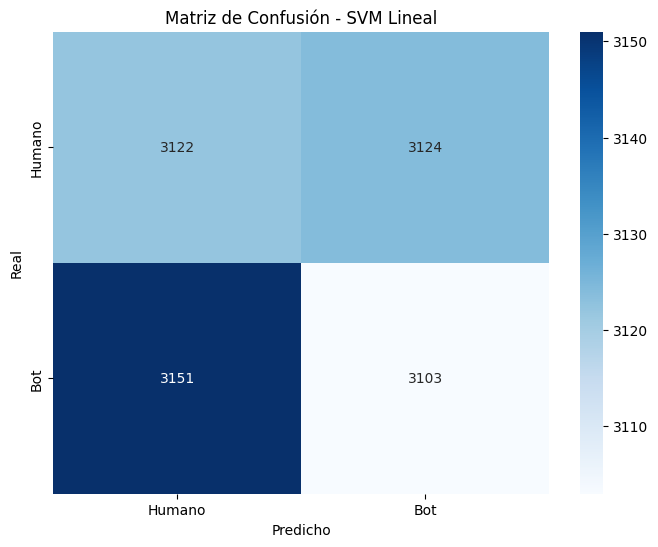


🚀 PESOS DE LAS VARIABLES (Importancia Lineal):
   • Follower Count: -0.0003
   • Retweet Count: 0.0001
   • Mention Count: -0.6834
   • Verified: -0.0000
   • account_age_days: 0.0000
   • tweet_length: 0.0000
   • retweet_follower_ratio: -0.0188
   • mention_follower_ratio: 0.0447


In [8]:
def main():
    df = cargar_datos_twitter()
    X, y, feature_names = feature_engineering(df)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    resultado = entrenar_svm_lineal(X_train_scaled, X_test_scaled, y_train, y_test)

    visualizar_lineal(resultado, y_test)

    print("\n🚀 PESOS DE LAS VARIABLES (Importancia Lineal):")
    importancias = resultado['model'].coef_[0]
    for name, imp in zip(feature_names, importancias):
        print(f"   • {name}: {imp:.4f}")

if __name__ == "__main__":
    main()

## SVM polinomial

In [9]:

def entrenar_svm_polinomial(X_train, X_test, y_train, y_test):
    print(f"\n{'='*60}")
    print(f"🔧 ENTRENANDO SVM KERNEL: POLINOMIAL")
    print(f"{'='*60}")

    start_time = time.time()


    svm = SVC(kernel='poly', degree=3, coef0=1, C=1.0, random_state=42)

    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    training_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    print(f"⏱  Tiempo: {training_time:.4f}s")
    print(f"✓  Accuracy: {accuracy:.4f}")
    print(f"✓  Vectores de soporte: {len(svm.support_vectors_)}")

    return {
        'model': svm,
        'y_pred': y_pred,
        'accuracy': accuracy,
        'f1': f1,
        'time': training_time
    }

✓ Dataset cargado exitosamente

🔧 ENTRENANDO SVM KERNEL: POLINOMIAL
⏱  Tiempo: 94.4193s
✓  Accuracy: 0.4922
✓  Vectores de soporte: 36697


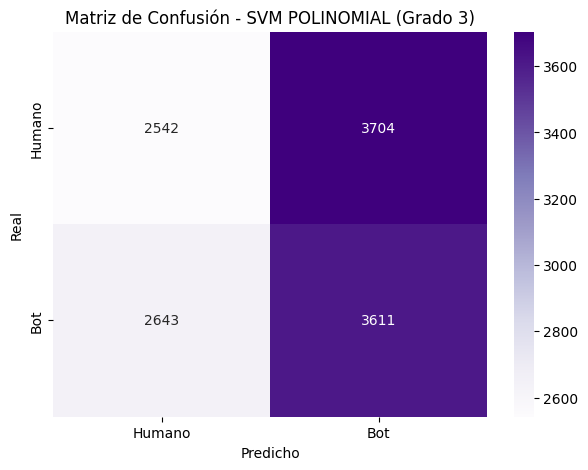


📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

      Humano       0.49      0.41      0.44      6246
         Bot       0.49      0.58      0.53      6254

    accuracy                           0.49     12500
   macro avg       0.49      0.49      0.49     12500
weighted avg       0.49      0.49      0.49     12500


💡 Nota: En el kernel polinomial no se muestran pesos (.coef_) 
porque la frontera de decisión es una curva compleja en un espacio mayor.


In [10]:

def main():
    df = cargar_datos_twitter()

    X, y, feature_names = feature_engineering(df)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    resultado = entrenar_svm_polinomial(X_train_scaled, X_test_scaled, y_train, y_test)

    plt.figure(figsize=(7, 5))
    cm = confusion_matrix(y_test, resultado['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=['Humano', 'Bot'], yticklabels=['Humano', 'Bot'])
    plt.title('Matriz de Confusión - SVM POLINOMIAL (Grado 3)')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()

    print("\n📋 REPORTE DE CLASIFICACIÓN:")
    print(classification_report(y_test, resultado['y_pred'], target_names=['Humano', 'Bot']))

    print("\n💡 Nota: En el kernel polinomial no se muestran pesos (.coef_) ")
    print("porque la frontera de decisión es una curva compleja en un espacio mayor.")

if __name__ == "__main__":
    main()

In [12]:
!pip install qiskit qiskit-machine-learning qiskit-algorithms pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 14.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3f99a442cb5c80ae1a90a78cd25607182a3a9cea1499d7eb3deeeef9cd269792
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7

In [10]:
!pip install pandas

## SVM Cuantico CON KERNEL LINEAL


In [8]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import StatevectorSampler
from qiskit_algorithms.state_fidelities import ComputeUncompute

def entrenar_svm_cuantico_lineal(X_train, X_test, y_train, y_test):
    print(f"\n{'='*60}")
    print(f"⚛️  ENTRENANDO SVM CUÁNTICO 'LINEAL' (ZFeatureMap)")
    print(f"{'='*60}")


    num_qubits = X_train.shape[1]
    feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

    sampler = StatevectorSampler()
    fidelity = ComputeUncompute(sampler=sampler)
    q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

    start_time = time.time()

    svm = SVC(kernel=q_kernel.evaluate)

    print("⏳ Mapeando datos al espacio cuántico lineal...")
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    training_time = time.time() - start_time

    print(f"⏱  Tiempo: {training_time:.2f}s | Acc: {accuracy_score(y_test, y_pred):.4f}")

    return {
        'model': svm,
        'y_pred': y_pred,
        'feature_map': feature_map,
        'time': training_time
    }

✓ Dataset cargado exitosamente

⚛️  ENTRENANDO SVM CUÁNTICO 'LINEAL' (ZFeatureMap)
⏳ Mapeando datos al espacio cuántico lineal...
⏱  Tiempo: 38.79s | Acc: 0.4500

RESUMEN DE RESULTADOS
              precision    recall  f1-score   support

      Humano       0.47      0.80      0.59        10
         Bot       0.33      0.10      0.15        10

    accuracy                           0.45        20
   macro avg       0.40      0.45      0.37        20
weighted avg       0.40      0.45      0.37        20



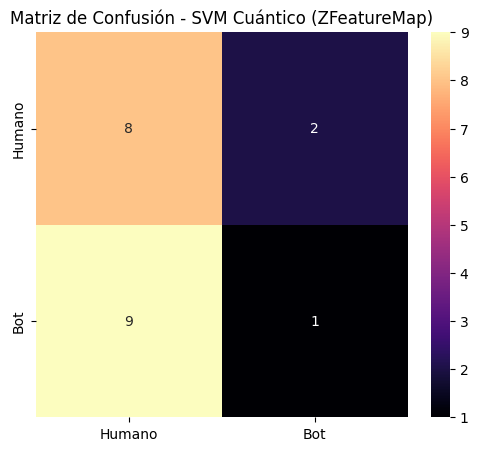


🎨 Circuito Cuántico (Feature Map):
     ┌───┐┌─────────────┐
q_0: ┤ H ├┤ P(2.0*x[0]) ├
     ├───┤├─────────────┤
q_1: ┤ H ├┤ P(2.0*x[1]) ├
     ├───┤├─────────────┤
q_2: ┤ H ├┤ P(2.0*x[2]) ├
     ├───┤├─────────────┤
q_3: ┤ H ├┤ P(2.0*x[3]) ├
     ├───┤├─────────────┤
q_4: ┤ H ├┤ P(2.0*x[4]) ├
     ├───┤├─────────────┤
q_5: ┤ H ├┤ P(2.0*x[5]) ├
     ├───┤├─────────────┤
q_6: ┤ H ├┤ P(2.0*x[6]) ├
     ├───┤├─────────────┤
q_7: ┤ H ├┤ P(2.0*x[7]) ├
     └───┘└─────────────┘


In [13]:
def main():
    df = cargar_datos_twitter()

    X, y, feature_names = feature_engineering(df)

    X_subset = X[:80]
    y_subset = y[:80]

    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset, test_size=0.25, random_state=42, stratify=y_subset
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = np.tanh(X_train_scaled) * np.pi
    X_test_scaled = np.tanh(X_test_scaled) * np.pi

    resultado = entrenar_svm_cuantico_lineal(X_train_scaled, X_test_scaled, y_train, y_test)

    print("\n" + "="*30)
    print("RESUMEN DE RESULTADOS")
    print("="*30)
    print(classification_report(y_test, resultado['y_pred'], target_names=['Humano', 'Bot']))

    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, resultado['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
                xticklabels=['Humano', 'Bot'], yticklabels=['Humano', 'Bot'])
    plt.title('Matriz de Confusión - SVM Cuántico (ZFeatureMap)')
    plt.show()

    print("\n🎨 Circuito Cuántico (Feature Map):")
    print(resultado['feature_map'].decompose())

if __name__ == "__main__":
    main()

## SVM Cuántico con KERNEL POLINOMIAL

In [14]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import StatevectorSampler
from qiskit_algorithms.state_fidelities import ComputeUncompute

In [16]:
def entrenar_svm_cuantico_polinomial(X_train, X_test, y_train, y_test):
    print(f"\n{'='*60}")
    print(f"⚛️  ENTRENANDO SVM CUÁNTICO 'POLINOMIAL' (ZZFeatureMap)")
    print(f"{'='*60}")


    num_qubits = X_train.shape[1]
    feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')


    sampler = StatevectorSampler()
    fidelity = ComputeUncompute(sampler=sampler)
    q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

    start_time = time.time()

    svm = SVC(kernel=q_kernel.evaluate)

    print("⏳ Calculando matriz de kernel cuántico con entrelazamiento...")
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    training_time = time.time() - start_time

    print(f"⏱  Tiempo: {training_time:.2f}s | Acc: {accuracy_score(y_test, y_pred):.4f}")

    return {
        'model': svm,
        'y_pred': y_pred,
        'feature_map': feature_map,
        'time': training_time
    }

✓ Dataset cargado exitosamente

⚛️  ENTRENANDO SVM CUÁNTICO 'POLINOMIAL' (ZZFeatureMap)
⏳ Calculando matriz de kernel cuántico con entrelazamiento...
⏱  Tiempo: 38.43s | Acc: 0.5556


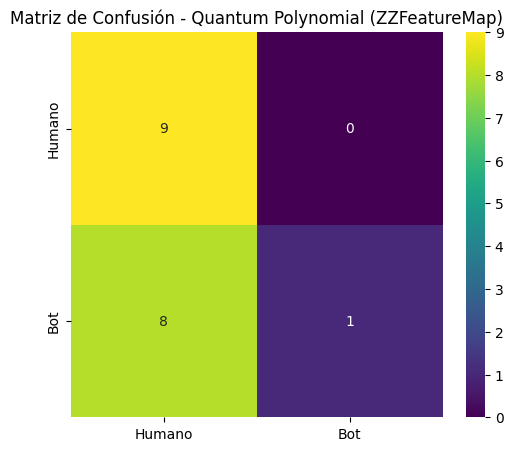


🎨 Circuito Cuántico ZZ (Fíjate en las puertas CX de entrelazamiento):
     ┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐└───┘»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──■──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     ├───┤├─────────────┤                                          └───┘»
q_3: ┤ H ├┤ P(2.0*x[3]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_4: ┤ H ├┤ P(2.0*x[4]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_5: ┤ H ├┤ P(2.0*x[5]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                

In [17]:
def main():
    df = cargar_datos_twitter()

    X, y, feature_names = feature_engineering(df)


    X_subset = X[:60]
    y_subset = y[:60]

    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset, test_size=0.3, random_state=42, stratify=y_subset
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = np.tanh(X_train_scaled) * np.pi
    X_test_scaled = np.tanh(X_test_scaled) * np.pi

    resultado = entrenar_svm_cuantico_polinomial(X_train_scaled, X_test_scaled, y_train, y_test)

    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, resultado['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                xticklabels=['Humano', 'Bot'], yticklabels=['Humano', 'Bot'])
    plt.title('Matriz de Confusión - Quantum Polynomial (ZZFeatureMap)')
    plt.show()

    print("\n🎨 Circuito Cuántico ZZ (Fíjate en las puertas CX de entrelazamiento):")
    print(resultado['feature_map'].decompose())

if __name__ == "__main__":
    main()